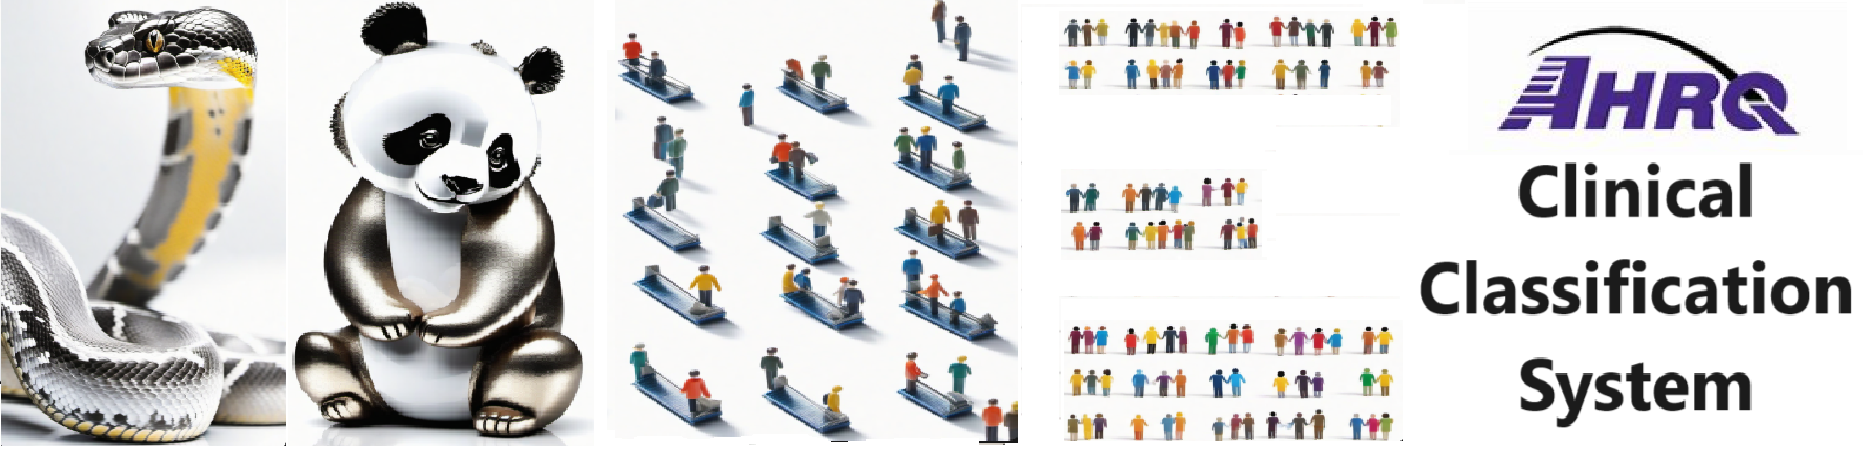

# AHRQ Clinical Classification System - Top 18 Categories
#### Joe Eberle  - josepheberle@outlook.com
## https://GitHub//JoeEberle

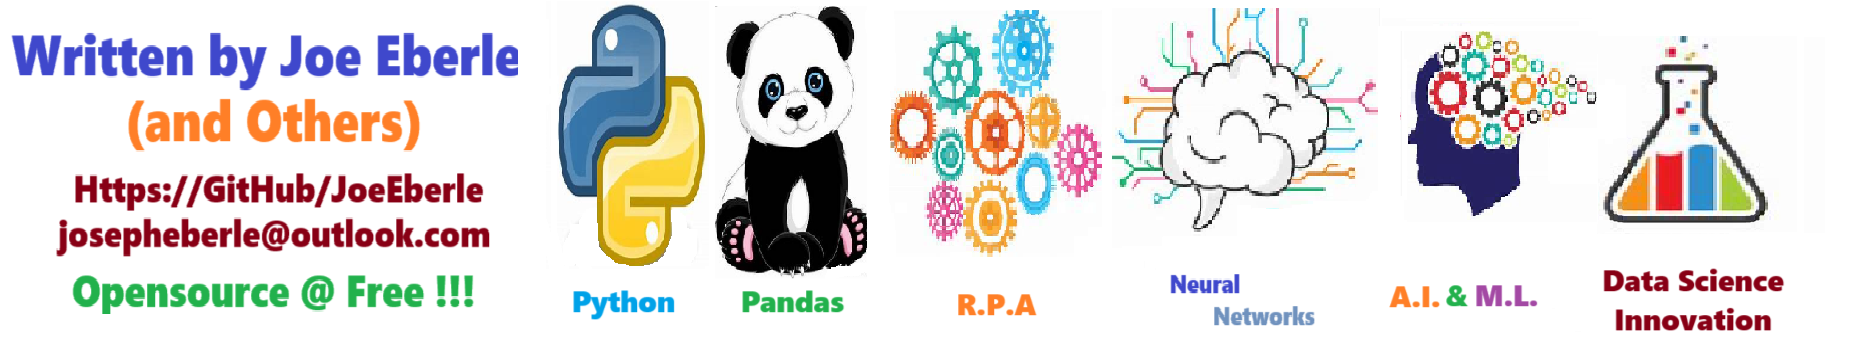

In [1]:
first_time_install = False
if first_time_install:
    ! pip install configparser
    ! pip install pyttsx3
    ! pip install datetime  
    ! pip install openpyxl   

In [2]:
# Import the necessary Libraries 
import configparser
import pyttsx3
import pandas as pd 
import glob, os
import timeit
import time
from datetime import date, datetime

## Step 0 - Start Config Parser and Name the solution

In [3]:
# Install any libraries you dont already have installed 
import configparser   
from datetime import date, datetime

# establish the configuration settings parser
config = configparser.ConfigParser()  
cfg = config.read('config.ini')   
config = configparser.ConfigParser()

# Establish some parameters 
solution_name = 'clinical_classification_system'

current_working_directory = os.getcwd()
print(f'Step 0 - The solution {solution_name} is starting with the current working directory is:{current_working_directory} ')

Step 0 - The solution clincal_classification_system is starting with the current working directory is:C:\Users\josep\clinical_classification_system 


## Step 0 - Initiate the Logger 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(True)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Process.') 

Process clincal_classification_system Step 0 - Initializing and starting Process.


## Step 1 - Read in the AHRQ CCS Clinical Classification System  Data 

In [32]:
df_ahrq_classification = pd.read_excel(r'c:\working_directory\excel\ahrq_ccs.xlsx')
# df_titanic = pd.read_csv("https://raw.githubusercontent.com/JoeEberle/datasets/main/titanic.csv")    # Read the CSV file into a pandas DataFrame
ql.pvlog('info',f'Process {solution_name} Step 1 - Read in {df_ahrq_classification.shape[0]} top level AHRQ Clinical Classes')
df_ahrq_classification.head(2)

Process clincal_classification_system Step 1 - Read in 18 top level AHRQ Clinical Classes


,Class Name,Class Description,Starting Diagnosis,Ending Diagnosis
0,Infectious and Parasitic Diseases,"Infections caused by bacteria, viruses, fungi,...",001,139
1,Neoplasms,"Abnormal growths or tumors, including various ...",140,239


## Step 2 - Read in the Medical Condition Classification  Data 

In [30]:
df_population_health_conditions = pd.read_excel(r'c:\working_directory\excel\top_population_health_conditions.xlsx')
# df_titanic = pd.read_csv("https://raw.githubusercontent.com/JoeEberle/datasets/main/titanic.csv")    # Read the CSV file into a pandas DataFrame
ql.pvlog('info',f'Process {solution_name} Step 2 - Read in {df_population_health_conditions.shape[0]} top medical conditions')
df_population_health_conditions.head(2)

Process clincal_classification_system Step 2 - Read in 20 top medical conditions


,Class Name,Abbreviation,Starting Diagnosis,Ending Diagnosis
0,Diabetes Mellitus,DMT,E10,E14
1,Cardiovascular Disease,CVD,I00,I99


In [37]:
# Test the classify_diagnosis function
diagnosis_code = "I10"  # Example diagnosis code
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

diagnosis_code = "N18.6"  # Example diagnosis code CKD 
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

diagnosis_code = "N18.1"  # Example diagnosis code CKD 
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

diagnosis_code = "E11"  # Example diagnosis code Diabetes
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

diagnosis_code = "I21"  # Example diagnosis code miacardial infarction 
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

diagnosis_code = "C79.81"  # Example diagnosis code miacardial infarction 
condition = classify_diagnosis(diagnosis_code, df_population_health_conditions)
print(f"The diagnosis code {diagnosis_code} corresponds to the condition: {condition}")

The diagnosis code I10 corresponds to the condition: Cardiovascular Disease
The diagnosis code N18.6 corresponds to the condition: Chronic Kidney Disease
The diagnosis code N18.1 corresponds to the condition: Chronic Kidney Disease
The diagnosis code E11 corresponds to the condition: Diabetes Mellitus
The diagnosis code I21 corresponds to the condition: Cardiovascular Disease
The diagnosis code C79.81 corresponds to the condition: Cancer


In [11]:
import pandas as pd

# Sample DataFrame structure (replace with your actual DataFrame)
# This DataFrame should have the structure you've defined earlier, with appropriate columns.
# Example DataFrame for reference:
df_population_health = pd.DataFrame.from_dict(population_health_conditions, orient='index')

def classify_diagnosis(diagnosis_code, df):
    # Search for the diagnosis code in the DataFrame
    matched_condition = df[
        (df['Starting Diagnosis'] <= diagnosis_code) & (diagnosis_code <= df['Ending Diagnosis'])
    ]
    
    if not matched_condition.empty:
        # If a match is found, return the condition
        return matched_condition.iloc[0]['Class Name']
    else:
        # If no match is found, return a message indicating it's not found
        return "Condition not found"


In [13]:
df_neoplasm = pd.DataFrame.from_dict(neoplasm_subcategories, orient='index')

def classify_neoplasm(diagnosis_code, df):
    # Search for the diagnosis code in the DataFrame
    matched_category = df[
        (df['Starting Diagnosis'] <= diagnosis_code) & (diagnosis_code <= df['Ending Diagnosis'])
    ]
    
    if not matched_category.empty:
        # If a match is found, return the neoplasm subcategory
        return matched_category.iloc[0]['Class Name']
    else:
        # If no match is found, return a message indicating it's not found
        return "Neoplasm subcategory not found"

# Test the classify_neoplasm function
diagnosis_code_liver_cancer = "C22.0"  # Example diagnosis code for liver cancer
diagnosis_code_breast_cancer = "C50.9"  # Example diagnosis code for breast cancer

subcategory_liver_cancer = classify_neoplasm(diagnosis_code_liver_cancer, df_neoplasm)
subcategory_breast_cancer = classify_neoplasm(diagnosis_code_breast_cancer, df_neoplasm)

print(f"The diagnosis code {diagnosis_code_liver_cancer} corresponds to the neoplasm subcategory: {subcategory_liver_cancer}")
print(f"The diagnosis code {diagnosis_code_breast_cancer} corresponds to the neoplasm subcategory: {subcategory_breast_cancer}")


NameError: name 'neoplasm_subcategories' is not defined

In [6]:
# AHRQ Clinical Classifications in JSON dictionary format
ahrq_classifications = {
    "1": {
        "Class Name": "Infectious and Parasitic Diseases",
        "Class Description": "Infections caused by bacteria, viruses, fungi, and parasites.",
        "Starting Diagnosis": "001",
        "Ending Diagnosis": "139",
    },
    "2": {
        "Class Name": "Neoplasms",
        "Class Description": "Abnormal growths or tumors, including various types of cancer diagnoses.",
        "Starting Diagnosis": "140",
        "Ending Diagnosis": "239",
    },
    "3": {
        "Class Name": "Endocrine, Nutritional, and Metabolic Diseases",
        "Class Description": "Conditions related to hormones, nutrition, and metabolism.",
        "Starting Diagnosis": "240",
        "Ending Diagnosis": "279",
    },
    "4": {
        "Class Name": "Mental Disorders",
        "Class Description": "Mental health conditions and psychiatric diagnoses.",
        "Starting Diagnosis": "280",
        "Ending Diagnosis": "319",
    },
    "5": {
        "Class Name": "Nervous System and Sense Organs",
        "Class Description": "Conditions affecting the brain, spinal cord, and sensory organs.",
        "Starting Diagnosis": "320",
        "Ending Diagnosis": "389",
    },
    "6": {
        "Class Name": "Circulatory System",
        "Class Description": "Heart and blood vessel-related conditions.",
        "Starting Diagnosis": "390",
        "Ending Diagnosis": "459",
    },
    "7": {
        "Class Name": "Respiratory System",
        "Class Description": "Conditions affecting the lungs and airways.",
        "Starting Diagnosis": "460",
        "Ending Diagnosis": "519",
    },
    "8": {
        "Class Name": "Digestive System",
        "Class Description": "Conditions related to the digestive tract and organs.",
        "Starting Diagnosis": "520",
        "Ending Diagnosis": "579",
    },
    "9": {
        "Class Name": "Genitourinary System",
        "Class Description": "Conditions affecting the urinary and reproductive systems.",
        "Starting Diagnosis": "580",
        "Ending Diagnosis": "629",
    },
    "10": {
        "Class Name": "Complications of Pregnancy, Childbirth, and the Puerperium",
        "Class Description": "Conditions related to pregnancy and childbirth.",
        "Starting Diagnosis": "630",
        "Ending Diagnosis": "679",
    },
    "11": {
        "Class Name": "Skin and Subcutaneous Tissue",
        "Class Description": "Conditions affecting the skin and underlying tissues.",
        "Starting Diagnosis": "680",
        "Ending Diagnosis": "709",
    },
    "12": {
        "Class Name": "Musculoskeletal System and Connective Tissue",
        "Class Description": "Conditions related to muscles, bones, and connective tissues.",
        "Starting Diagnosis": "710",
        "Ending Diagnosis": "739",
    },
    "13": {
        "Class Name": "Congenital Anomalies",
        "Class Description": "Birth defects and congenital conditions.",
        "Starting Diagnosis": "740",
        "Ending Diagnosis": "759",
    },
    "14": {
        "Class Name": "Conditions Originating in the Perinatal Period",
        "Class Description": "Conditions affecting newborns and infants.",
        "Starting Diagnosis": "760",
        "Ending Diagnosis": "779",
    },
    "15": {
        "Class Name": "Symptoms, Signs, and Ill-Defined Conditions",
        "Class Description": "Vague or ill-defined symptoms and conditions.",
        "Starting Diagnosis": "780",
        "Ending Diagnosis": "799",
    },
    "16": {
        "Class Name": "Injury and Poisoning",
        "Class Description": "Injuries and poisonings, including accidents and intentional harm.",
        "Starting Diagnosis": "800",
        "Ending Diagnosis": "999",
    },
    "17": {
        "Class Name": "Factors Influencing Health Status and Contact with Health Services",
        "Class Description": "Health-related factors and healthcare encounters.",
        "Starting Diagnosis": "V01",
        "Ending Diagnosis": "V82",
    },
    "18": {
        "Class Name": "Multiple Significant Trauma",
        "Class Description": "Multiple injuries or trauma conditions.",
        "Starting Diagnosis": "E800",
        "Ending Diagnosis": "E999",
    }
}

In [ ]:
oncology_type = {
    "1": {
        "Class Name": "Benign",
        "Class Description": "Benign tumors are non-cancerous growths that do not invade nearby tissues or spread to other parts of the body. They are typically not life-threatening.",
        "Starting Diagnosis": "D00",
        "Ending Diagnosis": "D48"
    },
    "2": {
        "Class Name": "In-situ",
        "Class Description": "In-situ tumors are abnormal cells that are present only in the layer of cells where they started. They have not invaded nearby tissues or spread to other parts of the body.",
        "Starting Diagnosis": "D00.0",
        "Ending Diagnosis": "D09.9"
    },
    "3": {
        "Class Name": "Malignancy",
        "Class Description": "Malignant tumors are cancerous growths that can invade nearby tissues and spread to other parts of the body, potentially posing a threat to health and life.",
        "Starting Diagnosis": "C00",
        "Ending Diagnosis": "D48"
    }
}

# Test the function and display the first 20 rows of the DataFrame
df_ontology_type = convert_to_dataframe(oncology_type)
df_ontology_type.head(20)


In [ ]:
oncology_treatment_types = {
    "1": {
        "Class Name": "Chemotherapy",
        "Class Description": "Chemotherapy involves the use of drugs to treat cancer. These drugs may be given orally or through intravenous (IV) infusion.",
        "Starting CPT Code": "96401",
        "Ending CPT Code": "96549"
    },
    "2": {
        "Class Name": "Radiation Therapy",
        "Class Description": "Radiation therapy uses high-energy radiation beams to target and destroy cancer cells or shrink tumors. It is often delivered externally via machines or internally via implants.",
        "Starting CPT Code": "77261",
        "Ending CPT Code": "77799"
    },
    "3": {
        "Class Name": "Medication",
        "Class Description": "Medications, including targeted therapies and immunotherapies, are used to treat cancer by inhibiting specific molecular processes or enhancing the body's immune response against cancer cells.",
        "Starting CPT Code": "00000",
        "Ending CPT Code": "00000"
    },
    "4": {
        "Class Name": "Palliative Care",
        "Class Description": "Palliative care focuses on relieving symptoms, improving the quality of life, and providing emotional support for cancer patients. It can be used alongside curative treatments.",
        "Starting CPT Code": "00000",
        "Ending CPT Code": "00000"
    },
    "5": {
        "Class Name": "Surgery",
        "Class Description": "Surgical procedures involve physically removing tumors or affected tissues. Various surgical techniques are used depending on the type and stage of cancer.",
        "Starting CPT Code": "10021",
        "Ending CPT Code": "69990"
    },
    "6": {
        "Class Name": "Wait and Watch",
        "Class Description": "In some cases, a 'watch and wait' approach is adopted, where treatment is delayed, and the patient's condition is closely monitored before deciding on further interventions.",
        "Starting CPT Code": "00000",
        "Ending CPT Code": "00000"
    },
    "7": {
        "Class Name": "Immunotherapy",
        "Class Description": "Immunotherapy is a type of cancer treatment that boosts the body's natural immune system to fight cancer. It includes immune checkpoint inhibitors and other immunomodulators.",
        "Starting CPT Code": "96413",
        "Ending CPT Code": "96549"
    },
    "8": {
        "Class Name": "Bone Marrow Transplant",
        "Class Description": "Bone marrow transplant (stem cell transplant) is a procedure to replace damaged or diseased bone marrow with healthy stem cells to treat blood cancers.",
        "Starting CPT Code": "38204",
        "Ending CPT Code": "38241"
    },
    "9": {
        "Class Name": "Targeted Therapy",
        "Class Description": "Targeted therapy uses drugs or other substances to identify and attack specific cancer cells or molecular targets that contribute to cancer growth.",
        "Starting CPT Code": "00000",
        "Ending CPT Code": "00000"
    }
}

# Accessing the definitions for each oncology treatment type
print(oncology_treatment_types["1"]["Class Name"])
print(oncology_treatment_types["2"]["Class Description"])
print(oncology_treatment_types["3"]["Starting CPT Code"])


In [ ]:
# Test the function and display the first 20 rows of the DataFrame
df_oncology_treatment_type = convert_to_dataframe(oncology_treatment_types)
df_oncology_treatment_type.head(20)

In [ ]:
oncology_patient_outcomes = {
    "1": {
        "Class Name": "Death",
        "Class Description": "Death outcome indicates that the patient did not survive the cancer diagnosis and treatment.",
    },
    "2": {
        "Class Name": "Remission",
        "Class Description": "Remission outcome indicates that the cancer has responded well to treatment, and the patient is free of detectable cancer cells.",
    },
    "3": {
        "Class Name": "Wait and Watch",
        "Class Description": "Wait and Watch outcome involves monitoring the patient's condition without immediate treatment, often used for certain types of slow-growing cancers.",
    },
    "4": {
        "Class Name": "Palliative Care",
        "Class Description": "Palliative care outcome focuses on symptom relief and improving the quality of life for patients with advanced cancer, not aimed at curing the disease.",
    },
    "5": {
        "Class Name": "Continued Treatment",
        "Class Description": "Continued Treatment outcome indicates that the patient is undergoing ongoing cancer treatment to manage or control the disease.",
    }
}

# Accessing the definitions for each oncology patient outcome
print(oncology_patient_outcomes["1"]["Class Name"])
print(oncology_patient_outcomes["2"]["Class Description"])


In [ ]:
# Test the function and display the first 20 rows of the DataFrame
df_oncology_patient_outcomes = convert_to_dataframe(oncology_patient_outcomes)
df_oncology_patient_outcomes.head(20)

In [ ]:
oncology_classifications_json = {
  "2": {
    "Class Name": "Neoplasms",
    "Class Description": "Refers to abnormal growths or tumors. This category includes various types of cancer diagnoses.",
    "Starting Diagnosis": "C00",
    "Ending Diagnosis": "D49",
    "Subcategories": {
      "Breast Cancer": {
        "Class Name": "Breast Cancer",
        "Class Description": "Cancer that originates in the breast tissue.",
        "Starting Diagnosis": "C50.0",
        "Ending Diagnosis": "C50.9"
      },
      "Colon Cancer": {
        "Class Name": "Colon Cancer",
        "Class Description": "Cancer that affects the colon or large intestine.",
        "Starting Diagnosis": "C18.0",
        "Ending Diagnosis": "C18.9"
      },
      "Skin Cancer": {
        "Class Name": "Skin Cancer",
        "Class Description": "Cancer that develops in the skin.",
        "Starting Diagnosis": "C43.0",
        "Ending Diagnosis": "C44.9"
      },
      "Lung Cancer": {
        "Class Name": "Lung Cancer",
        "Class Description": "Cancer that originates in the lungs.",
        "Starting Diagnosis": "C34.0",
        "Ending Diagnosis": "C34.9"
      },
      "Prostate Cancer": {
        "Class Name": "Prostate Cancer",
        "Class Description": "Cancer that affects the prostate gland in men.",
        "Starting Diagnosis": "C61.0",
        "Ending Diagnosis": "C61.9"
      },
      "Liver Cancer": {
        "Class Name": "Liver Cancer",
        "Class Description": "Cancer that affects the liver.",
        "Starting Diagnosis": "C22.0",
        "Ending Diagnosis": "C22.9"
      },
      "Thoracic Cancer": {
        "Class Name": "Thoracic Cancer",
        "Class Description": "Cancer that occurs in the thoracic region, which includes the chest and upper abdomen.",
        "Starting Diagnosis": "C76.0",
        "Ending Diagnosis": "C80.9"
      },
      "Pancreatic Cancer": {
        "Class Name": "Pancreatic Cancer",
        "Class Description": "Cancer that affects the pancreas.",
        "Starting Diagnosis": "C25.0",
        "Ending Diagnosis": "C25.9"
      },
      "Cancers of the Blood": {
        "Class Name": "Cancers of the Blood",
        "Class Description": "Hematologic malignancies, including leukemia, lymphoma, and myeloma, which affect the blood and bone marrow.",
        "Starting Diagnosis": "C81.00",
        "Ending Diagnosis": "D49.9"
      },
      "Brain Cancer": {
        "Class Name": "Brain Cancer",
        "Class Description": "Cancer that affects the brain and central nervous system.",
        "Starting Diagnosis": "C71.0",
        "Ending Diagnosis": "C71.9"
      },
      "Thyroid Cancer": {
        "Class Name": "Thyroid Cancer",
        "Class Description": "Cancer that originates in the thyroid gland.",
        "Starting Diagnosis": "C73.0",
        "Ending Diagnosis": "C73.9"
      }
    }
  }
}


In [ ]:
import pandas as pd
import json

def json_subcategory_to_dataframe(json_data, category_name):
    # Load the JSON data from a string
    data = json.loads(json_data)
    
    # Get the subcategories under the specified category
    subcategories = data[category_name].get("Subcategories", {})
    
    # Convert the JSON data for subcategories to a DataFrame
    df = pd.DataFrame.from_dict(subcategories, orient='index')
    
    return df

# Example JSON data (using the previously defined 'oncology_classifications_json' variable)
json_data = json.dumps(oncology_classifications_json)  # Convert the dictionary to a JSON string
category_name = "2"  # Neoplasms category
df_neoplasm_subclass = json_subcategory_to_dataframe(json_data, category_name)

# Print the DataFrame
df_neoplasm_subclass.head(20) 


In [ ]:
# Optional Step 0 - Build a working directory to house your analysis
directory_path = r'c:\working_directory\file_registry'
# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

In [ ]:
import pandas as pd

# Assuming df_neoplasm_subclass already exists in memory with the provided data
# Example DataFrame for reference:
# df_neoplasm_subclass = pd.DataFrame.from_dict(neoplasm_subcategories, orient='index')

def classify_neoplasm(diagnosis_code, df):
    # Search for the diagnosis code in the DataFrame
    matched_category = df[
        (df['Starting Diagnosis'] <= diagnosis_code) & (diagnosis_code <= df['Ending Diagnosis'])
    ]
    
    if not matched_category.empty:
        # If a match is found, return the neoplasm subcategory
        return matched_category.index[0]
    else:
        # If no match is found, return a message indicating it's not found
        return "Neoplasm subcategory not found"

# Test the classify_neoplasm function
diagnosis_code_liver_cancer = "C22.0"  # Example diagnosis code for liver cancer
diagnosis_code_breast_cancer = "C50.5"  # Example diagnosis code for breast cancer
diagnosis_code_colon_cancer = "C18.2"  # Example diagnosis code for colon cancer
diagnosis_code_skin_cancer = "C44.3"  # Example diagnosis code for skin cancer

subcategory_liver_cancer = classify_neoplasm(diagnosis_code_liver_cancer, df_neoplasm_subclass)
subcategory_breast_cancer = classify_neoplasm(diagnosis_code_breast_cancer, df_neoplasm_subclass)
subcategory_colon_cancer = classify_neoplasm(diagnosis_code_colon_cancer, df_neoplasm_subclass)
subcategory_skin_cancer = classify_neoplasm(diagnosis_code_skin_cancer, df_neoplasm_subclass)

print(f"The diagnosis code {diagnosis_code_liver_cancer} corresponds to the neoplasm subcategory: {subcategory_liver_cancer}")
print(f"The diagnosis code {diagnosis_code_breast_cancer} corresponds to the neoplasm subcategory: {subcategory_breast_cancer}")
print(f"The diagnosis code {diagnosis_code_colon_cancer} corresponds to the neoplasm subcategory: {subcategory_colon_cancer}")
print(f"The diagnosis code {diagnosis_code_skin_cancer} corresponds to the neoplasm subcategory: {subcategory_skin_cancer}")


In [14]:
# Optional Step 0 - Build a working directory to house your analysis
directory_path = r'c:\working_directory\excel'
# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'c:\working_directory\excel' already exists.


In [ ]:
oncology_type = {
    "Benign": {
        "Class Name": "Benign",
        "Class Description": "Benign tumors are non-cancerous growths that do not invade nearby tissues or spread to other parts of the body. They are typically not life-threatening.",
        "Starting Diagnosis": "D00",
        "Ending Diagnosis": "D48"
    },
    "In-situ": {
        "Class Name": "In-situ",
        "Class Description": "In-situ tumors are abnormal cells that are present only in the layer of cells where they started. They have not invaded nearby tissues or spread to other parts of the body.",
        "Starting Diagnosis": "D00.0",
        "Ending Diagnosis": "D09.9"
    },
    "Malignancy": {
        "Class Name": "Malignancy",
        "Class Description": "Malignant tumors are cancerous growths that can invade nearby tissues and spread to other parts of the body, potentially posing a threat to health and life.",
        "Starting Diagnosis": "C00",
        "Ending Diagnosis": "D48"
    }
}

# Accessing the definitions for each oncology type
print(oncology_type["Benign"]["Class Name"])
print(oncology_type["In-situ"]["Class Description"])
print(oncology_type["Malignancy"]["Starting Diagnosis"])


In [ ]:
df_oncology_type = json_to_dataframe(oncology_type)
df_oncology_type.head()

In [ ]:
import pandas as pd

# AHRQ Clinical Classifications in JSON dictionary format
ahrq_classifications = {
    "1": {
        "Class Name": "Infectious and Parasitic Diseases",
        "Class Description": "Infections caused by bacteria, viruses, fungi, and parasites.",
        "Starting Diagnosis": "001",
        "Ending Diagnosis": "139",
    },
    "2": {
        "Class Name": "Neoplasms",
        "Class Description": "Abnormal growths or tumors, including various types of cancer diagnoses.",
        "Starting Diagnosis": "140",
        "Ending Diagnosis": "239",
    },
    "3": {
        "Class Name": "Endocrine, Nutritional, and Metabolic Diseases",
        "Class Description": "Conditions related to hormones, nutrition, and metabolism.",
        "Starting Diagnosis": "240",
        "Ending Diagnosis": "279",
    },
    "4": {
        "Class Name": "Mental Disorders",
        "Class Description": "Mental health conditions and psychiatric diagnoses.",
        "Starting Diagnosis": "280",
        "Ending Diagnosis": "319",
    },
    "5": {
        "Class Name": "Nervous System and Sense Organs",
        "Class Description": "Conditions affecting the brain, spinal cord, and sensory organs.",
        "Starting Diagnosis": "320",
        "Ending Diagnosis": "389",
    },
    "6": {
        "Class Name": "Circulatory System",
        "Class Description": "Heart and blood vessel-related conditions.",
        "Starting Diagnosis": "390",
        "Ending Diagnosis": "459",
    },
    "7": {
        "Class Name": "Respiratory System",
        "Class Description": "Conditions affecting the lungs and airways.",
        "Starting Diagnosis": "460",
        "Ending Diagnosis": "519",
    },
    "8": {
        "Class Name": "Digestive System",
        "Class Description": "Conditions related to the digestive tract and organs.",
        "Starting Diagnosis": "520",
        "Ending Diagnosis": "579",
    },
    "9": {
        "Class Name": "Genitourinary System",
        "Class Description": "Conditions affecting the urinary and reproductive systems.",
        "Starting Diagnosis": "580",
        "Ending Diagnosis": "629",
    },
    "10": {
        "Class Name": "Complications of Pregnancy, Childbirth, and the Puerperium",
        "Class Description": "Conditions related to pregnancy and childbirth.",
        "Starting Diagnosis": "630",
        "Ending Diagnosis": "679",
    },
    "11": {
        "Class Name": "Skin and Subcutaneous Tissue",
        "Class Description": "Conditions affecting the skin and underlying tissues.",
        "Starting Diagnosis": "680",
        "Ending Diagnosis": "709",
    },
    "12": {
        "Class Name": "Musculoskeletal System and Connective Tissue",
        "Class Description": "Conditions related to muscles, bones, and connective tissues.",
        "Starting Diagnosis": "710",
        "Ending Diagnosis": "739",
    },
    "13": {
        "Class Name": "Congenital Anomalies",
        "Class Description": "Birth defects and congenital conditions.",
        "Starting Diagnosis": "740",
        "Ending Diagnosis": "759",
    },
    "14": {
        "Class Name": "Conditions Originating in the Perinatal Period",
        "Class Description": "Conditions affecting newborns and infants.",
        "Starting Diagnosis": "760",
        "Ending Diagnosis": "779",
    },
    "15": {
        "Class Name": "Symptoms, Signs, and Ill-Defined Conditions",
        "Class Description": "Vague or ill-defined symptoms and conditions.",
        "Starting Diagnosis": "780",
        "Ending Diagnosis": "799",
    },
    "16": {
        "Class Name": "Injury and Poisoning",
        "Class Description": "Injuries and poisonings, including accidents and intentional harm.",
        "Starting Diagnosis": "800",
        "Ending Diagnosis": "999",
    },
    "17": {
        "Class Name": "Factors Influencing Health Status and Contact with Health Services",
        "Class Description": "Health-related factors and healthcare encounters.",
        "Starting Diagnosis": "V01",
        "Ending Diagnosis": "V82",
    },
    "18": {
        "Class Name": "Multiple Significant Trauma",
        "Class Description": "Multiple injuries or trauma conditions.",
        "Starting Diagnosis": "E800",
        "Ending Diagnosis": "E999",
    }
}

# Function to convert the AHRQ Clinical Classifications dictionary to a DataFrame
def convert_to_dataframe(data):
    df = pd.DataFrame.from_dict(data, orient='index')
    return df

# Test the function and display the first 20 rows of the DataFrame
df_ahrq_classification = convert_to_dataframe(ahrq_classifications)
df_ahrq_classification.head(20)

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

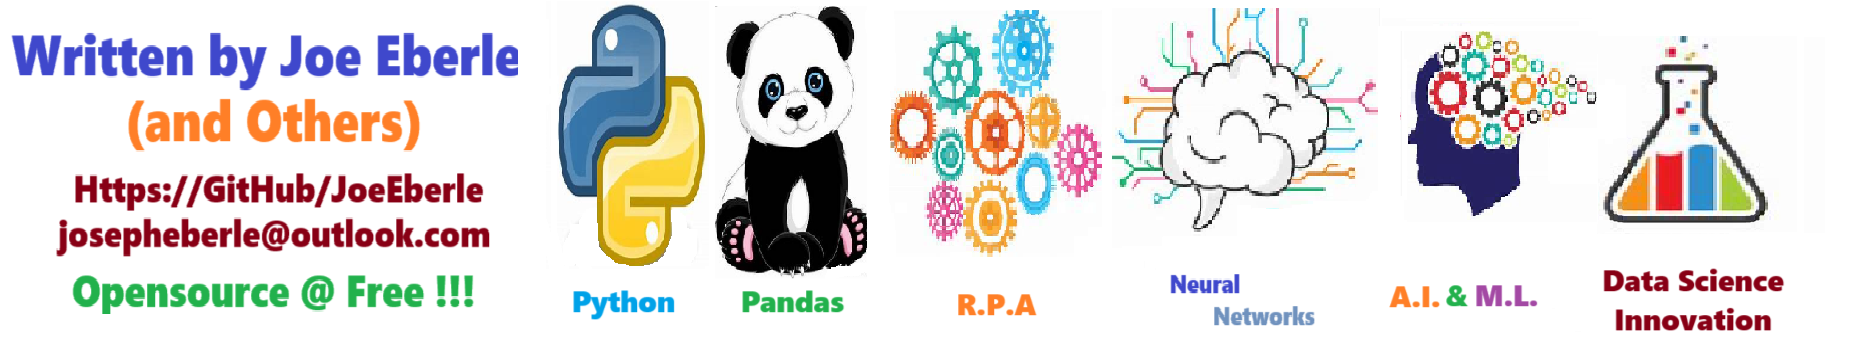

#### Infectious and Parasitic Diseases (ICD-10 Codes A00-B99)
#### Neoplasms (ICD-10 Codes C00-D49)
#### Endocrine, Nutritional, Metabolic, and Immunity Disorders (ICD-10 Codes E00-E89)
#### Diseases of the Blood and Blood-Forming Organs (ICD-10 Codes D50-D89)
#### Mental Illness (ICD-10 Codes F01-F99)
#### Nervous System and Sense Organ Disorders (ICD-10 Codes G00-H95)
#### Circulatory System Disorders (ICD-10 Codes I00-I99)
#### Respiratory System Disorders (ICD-10 Codes J00-J99)
#### Digestive System Disorders (ICD-10 Codes K00-K95)
#### Genitourinary System Disorders (ICD-10 Codes N00-N99, O00-O9A)
#### Complications of Pregnancy, Childbirth, and the Puerperium (ICD-10 Codes O10-O99)
#### Skin and Subcutaneous Tissue Disorders (ICD-10 Codes L00-L99)
#### Musculoskeletal System and Connective Tissue Disorders (ICD-10 Codes M00-M99)
#### Congenital Anomalies (ICD-10 Codes Q00-Q99)
#### Certain Conditions Originating in the Perinatal Period (ICD-10 Codes P00-P96)
#### Symptoms, Signs, and Ill-Defined Conditions (ICD-10 Codes R00-R99)
#### Injury and Poisoning (ICD-10 Codes S00-T88)
#### Factors Influencing Health Status and Contact with Health Services (ICD-10 Codes Z00-Z99)

In [15]:
# Optional Step 0 - Build a working directory to house your analysis
directory_path = r'c:\working_directory\excel'
# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'c:\working_directory\excel' already exists.


In [33]:
import pandas as pd

# AHRQ Clinical Classifications in JSON dictionary format
ahrq_classifications = {
    "1": {
        "Class Name": "Infectious and Parasitic Diseases",
        "Class Description": "Infections caused by bacteria, viruses, fungi, and parasites.",
        "Starting Diagnosis": "001",
        "Ending Diagnosis": "139",
    },
    "2": {
        "Class Name": "Neoplasms",
        "Class Description": "Abnormal growths or tumors, including various types of cancer diagnoses.",
        "Starting Diagnosis": "140",
        "Ending Diagnosis": "239",
    },
    "3": {
        "Class Name": "Endocrine, Nutritional, and Metabolic Diseases",
        "Class Description": "Conditions related to hormones, nutrition, and metabolism.",
        "Starting Diagnosis": "240",
        "Ending Diagnosis": "279",
    },
    "4": {
        "Class Name": "Mental Disorders",
        "Class Description": "Mental health conditions and psychiatric diagnoses.",
        "Starting Diagnosis": "280",
        "Ending Diagnosis": "319",
    },
    "5": {
        "Class Name": "Nervous System and Sense Organs",
        "Class Description": "Conditions affecting the brain, spinal cord, and sensory organs.",
        "Starting Diagnosis": "320",
        "Ending Diagnosis": "389",
    },
    "6": {
        "Class Name": "Circulatory System",
        "Class Description": "Heart and blood vessel-related conditions.",
        "Starting Diagnosis": "390",
        "Ending Diagnosis": "459",
    },
    "7": {
        "Class Name": "Respiratory System",
        "Class Description": "Conditions affecting the lungs and airways.",
        "Starting Diagnosis": "460",
        "Ending Diagnosis": "519",
    },
    "8": {
        "Class Name": "Digestive System",
        "Class Description": "Conditions related to the digestive tract and organs.",
        "Starting Diagnosis": "520",
        "Ending Diagnosis": "579",
    },
    "9": {
        "Class Name": "Genitourinary System",
        "Class Description": "Conditions affecting the urinary and reproductive systems.",
        "Starting Diagnosis": "580",
        "Ending Diagnosis": "629",
    },
    "10": {
        "Class Name": "Complications of Pregnancy, Childbirth, and the Puerperium",
        "Class Description": "Conditions related to pregnancy and childbirth.",
        "Starting Diagnosis": "630",
        "Ending Diagnosis": "679",
    },
    "11": {
        "Class Name": "Skin and Subcutaneous Tissue",
        "Class Description": "Conditions affecting the skin and underlying tissues.",
        "Starting Diagnosis": "680",
        "Ending Diagnosis": "709",
    },
    "12": {
        "Class Name": "Musculoskeletal System and Connective Tissue",
        "Class Description": "Conditions related to muscles, bones, and connective tissues.",
        "Starting Diagnosis": "710",
        "Ending Diagnosis": "739",
    },
    "13": {
        "Class Name": "Congenital Anomalies",
        "Class Description": "Birth defects and congenital conditions.",
        "Starting Diagnosis": "740",
        "Ending Diagnosis": "759",
    },
    "14": {
        "Class Name": "Conditions Originating in the Perinatal Period",
        "Class Description": "Conditions affecting newborns and infants.",
        "Starting Diagnosis": "760",
        "Ending Diagnosis": "779",
    },
    "15": {
        "Class Name": "Symptoms, Signs, and Ill-Defined Conditions",
        "Class Description": "Vague or ill-defined symptoms and conditions.",
        "Starting Diagnosis": "780",
        "Ending Diagnosis": "799",
    },
    "16": {
        "Class Name": "Injury and Poisoning",
        "Class Description": "Injuries and poisonings, including accidents and intentional harm.",
        "Starting Diagnosis": "800",
        "Ending Diagnosis": "999",
    },
    "17": {
        "Class Name": "Factors Influencing Health Status and Contact with Health Services",
        "Class Description": "Health-related factors and healthcare encounters.",
        "Starting Diagnosis": "V01",
        "Ending Diagnosis": "V82",
    },
    "18": {
        "Class Name": "Multiple Significant Trauma",
        "Class Description": "Multiple injuries or trauma conditions.",
        "Starting Diagnosis": "E800",
        "Ending Diagnosis": "E999",
    }
}

# Function to convert the AHRQ Clinical Classifications dictionary to a DataFrame
def convert_to_dataframe(data):
    df = pd.DataFrame.from_dict(data, orient='index')
    return df

# Test the function and display the first 20 rows of the DataFrame
df_ahrq_classification = convert_to_dataframe(ahrq_classifications)
df_ahrq_classification.head(20)

,Class Name,Class Description,Starting Diagnosis,Ending Diagnosis
1,Infectious and Parasitic Diseases,"Infections caused by bacteria, viruses, fungi,...",001,139
2,Neoplasms,"Abnormal growths or tumors, including various ...",140,239
3,"Endocrine, Nutritional, and Metabolic Diseases","Conditions related to hormones, nutrition, and...",240,279
4,Mental Disorders,Mental health conditions and psychiatric diagn...,280,319
5,Nervous System and Sense Organs,"Conditions affecting the brain, spinal cord, a...",320,389
6,Circulatory System,Heart and blood vessel-related conditions.,390,459
7,Respiratory System,Conditions affecting the lungs and airways.,460,519
8,Digestive System,Conditions related to the digestive tract and ...,520,579
9,Genitourinary System,Conditions affecting the urinary and reproduct...,580,629
10,"Complications of Pregnancy, Childbirth, and th...",Conditions related to pregnancy and childbirth.,630,679


In [7]:
# Function to convert the AHRQ Clinical Classifications dictionary to a DataFrame
def convert_to_dataframe(data):
    df = pd.DataFrame.from_dict(data, orient='index')
    return df

In [34]:
population_health_conditions = {
    "1": {
        "Class Name": "Diabetes Mellitus",
        "Abbreviation": "DMT",
        "Starting Diagnosis": "E10",
        "Ending Diagnosis": "E14"
    },
    "2": {
        "Class Name": "Cardiovascular Disease",
        "Abbreviation": "CVD",
        "Starting Diagnosis": "I00",
        "Ending Diagnosis": "I99"
    },
    "3": {
        "Class Name": "Hypertension",
        "Abbreviation": "HTN",
        "Starting Diagnosis": "I10",
        "Ending Diagnosis": "I15"
    },
    "4": {
        "Class Name": "Obesity",
        "Abbreviation": "OBS",
        "Starting Diagnosis": "E66",
        "Ending Diagnosis": "E66"
    },
    "5": {
        "Class Name": "Chronic Respiratory Disease",
        "Abbreviation": "CRD",
        "Starting Diagnosis": "J40",
        "Ending Diagnosis": "J47"
    },
    "6": {
        "Class Name": "Depression",
        "Abbreviation": "DEP",
        "Starting Diagnosis": "F32",
        "Ending Diagnosis": "F39"
    },
    "7": {
        "Class Name": "Osteoarthritis",
        "Abbreviation": "OAR",
        "Starting Diagnosis": "M15",
        "Ending Diagnosis": "M19"
    },
    "8": {
        "Class Name": "Asthma",
        "Abbreviation": "AST",
        "Starting Diagnosis": "J45",
        "Ending Diagnosis": "J46"
    },
    "9": {
        "Class Name": "Chronic Kidney Disease",
        "Abbreviation": "CKD",
        "Starting Diagnosis": "N18",
        "Ending Diagnosis": "N19"
    },
    "10": {
        "Class Name": "Cancer",
        "Abbreviation": "CAN",
        "Starting Diagnosis": "C00",
        "Ending Diagnosis": "D48"
    },
    "11": {
        "Class Name": "Alzheimer's Disease",
        "Abbreviation": "ALZ",
        "Starting Diagnosis": "G30",
        "Ending Diagnosis": "G30"
    },
    "12": {
        "Class Name": "Stroke",
        "Abbreviation": "STR",
        "Starting Diagnosis": "I60",
        "Ending Diagnosis": "I69"
    },
    "13": {
        "Class Name": "Chronic Liver Disease",
        "Abbreviation": "CLD",
        "Starting Diagnosis": "K70",
        "Ending Diagnosis": "K76"
    },
    "14": {
        "Class Name": "Rheumatoid Arthritis",
        "Abbreviation": "RAA",
        "Starting Diagnosis": "M05",
        "Ending Diagnosis": "M06"
    },
    "15": {
        "Class Name": "HIV/AIDS",
        "Abbreviation": "HIV",
        "Starting Diagnosis": "B20",
        "Ending Diagnosis": "B97"
    },
    "16": {
        "Class Name": "Anxiety Disorders",
        "Abbreviation": "ANX",
        "Starting Diagnosis": "F41",
        "Ending Diagnosis": "F41"
    },
    "17": {
        "Class Name": "Substance Use Disorders",
        "Abbreviation": "SUD",
        "Starting Diagnosis": "F10",
        "Ending Diagnosis": "F19"
    },
    "18": {
        "Class Name": "Hepatitis",
        "Abbreviation": "HEP",
        "Starting Diagnosis": "B15",
        "Ending Diagnosis": "B19"
    },
    "19": {
        "Class Name": "Epilepsy",
        "Abbreviation": "EPI",
        "Starting Diagnosis": "G40",
        "Ending Diagnosis": "G41"
    },
    "20": {
        "Class Name": "Thyroid Disorders",
        "Abbreviation": "THY",
        "Starting Diagnosis": "E00",
        "Ending Diagnosis": "E07"
    }
}

# Accessing the definitions for each population health condition
print(population_health_conditions["1"]["Class Name"])
print(population_health_conditions["2"]["Abbreviation"])
print(population_health_conditions["3"]["Starting Diagnosis"])


Diabetes Mellitus
CVD
I10


In [35]:
# Test the function and display the first 20 rows of the DataFrame
df_ahrq_classification = convert_to_dataframe(ahrq_classifications)
df_ahrq_classification.to_excel(r'c:\working_directory\excel\ahrq_ccs.xlsx', index = False)
df_ahrq_classification.head(20)

,Class Name,Class Description,Starting Diagnosis,Ending Diagnosis
1,Infectious and Parasitic Diseases,"Infections caused by bacteria, viruses, fungi,...",001,139
2,Neoplasms,"Abnormal growths or tumors, including various ...",140,239
3,"Endocrine, Nutritional, and Metabolic Diseases","Conditions related to hormones, nutrition, and...",240,279
4,Mental Disorders,Mental health conditions and psychiatric diagn...,280,319
5,Nervous System and Sense Organs,"Conditions affecting the brain, spinal cord, a...",320,389
6,Circulatory System,Heart and blood vessel-related conditions.,390,459
7,Respiratory System,Conditions affecting the lungs and airways.,460,519
8,Digestive System,Conditions related to the digestive tract and ...,520,579
9,Genitourinary System,Conditions affecting the urinary and reproduct...,580,629
10,"Complications of Pregnancy, Childbirth, and th...",Conditions related to pregnancy and childbirth.,630,679


In [36]:
# Test the function and display the first 20 rows of the DataFrame
df_population_health_conditions = convert_to_dataframe(population_health_conditions)
df_population_health_conditions.to_excel(r'c:\working_directory\excel\top_population_health_conditions.xlsx', index = False)
df_population_health_conditions.head(20)

,Class Name,Abbreviation,Starting Diagnosis,Ending Diagnosis
1,Diabetes Mellitus,DMT,E10,E14
2,Cardiovascular Disease,CVD,I00,I99
3,Hypertension,HTN,I10,I15
4,Obesity,OBS,E66,E66
5,Chronic Respiratory Disease,CRD,J40,J47
6,Depression,DEP,F32,F39
7,Osteoarthritis,OAR,M15,M19
8,Asthma,AST,J45,J46
9,Chronic Kidney Disease,CKD,N18,N19
10,Cancer,CAN,C00,D48


In [17]:
# Test the function and display the first 20 rows of the DataFrame
df_ahrq_classification = convert_to_dataframe(ahrq_classifications)
df_ahrq_classification.to_excel(r'c:\working_directory\excel\ahrq_ccs.xlsx', index = False)
df_ahrq_classification.head(20)

,Class Name,Class Description,Starting Diagnosis,Ending Diagnosis
1,Infectious and Parasitic Diseases,"Infections caused by bacteria, viruses, fungi,...",001,139
2,Neoplasms,"Abnormal growths or tumors, including various ...",140,239
3,"Endocrine, Nutritional, and Metabolic Diseases","Conditions related to hormones, nutrition, and...",240,279
4,Mental Disorders,Mental health conditions and psychiatric diagn...,280,319
5,Nervous System and Sense Organs,"Conditions affecting the brain, spinal cord, a...",320,389
6,Circulatory System,Heart and blood vessel-related conditions.,390,459
7,Respiratory System,Conditions affecting the lungs and airways.,460,519
8,Digestive System,Conditions related to the digestive tract and ...,520,579
9,Genitourinary System,Conditions affecting the urinary and reproduct...,580,629
10,"Complications of Pregnancy, Childbirth, and th...",Conditions related to pregnancy and childbirth.,630,679


In [28]:
# Test the function and display the first 20 rows of the DataFrame
df_population_health_conditions = convert_to_dataframe(population_health_conditions)
df_population_health_conditions.to_excel(r'c:\working_directory\excel\top_population_health_conditions.xlsx', index = False)
df_population_health_conditions.head(20)

,Class Name,Abbreviation,Starting Diagnosis,Ending Diagnosis
1,Diabetes Mellitus,DMT,E10,E14
2,Cardiovascular Disease,CVD,I00,I99
3,Hypertension,HTN,I10,I15
4,Obesity,OBS,E66,E66
5,Chronic Respiratory Disease,CRD,J40,J47
6,Depression,DEP,F32,F39
7,Osteoarthritis,OAR,M15,M19
8,Asthma,AST,J45,J46
9,Chronic Kidney Disease,CKD,N18,N19
10,Cancer,CAN,C00,D48


In [6]:
# AHRQ Clinical Classifications in JSON dictionary format
ahrq_classifications = {
    "1": {
        "Class Name": "Infectious and Parasitic Diseases",
        "Class Description": "Infections caused by bacteria, viruses, fungi, and parasites.",
        "Starting Diagnosis": "001",
        "Ending Diagnosis": "139",
    },
    "2": {
        "Class Name": "Neoplasms",
        "Class Description": "Abnormal growths or tumors, including various types of cancer diagnoses.",
        "Starting Diagnosis": "140",
        "Ending Diagnosis": "239",
    },
    "3": {
        "Class Name": "Endocrine, Nutritional, and Metabolic Diseases",
        "Class Description": "Conditions related to hormones, nutrition, and metabolism.",
        "Starting Diagnosis": "240",
        "Ending Diagnosis": "279",
    },
    "4": {
        "Class Name": "Mental Disorders",
        "Class Description": "Mental health conditions and psychiatric diagnoses.",
        "Starting Diagnosis": "280",
        "Ending Diagnosis": "319",
    },
    "5": {
        "Class Name": "Nervous System and Sense Organs",
        "Class Description": "Conditions affecting the brain, spinal cord, and sensory organs.",
        "Starting Diagnosis": "320",
        "Ending Diagnosis": "389",
    },
    "6": {
        "Class Name": "Circulatory System",
        "Class Description": "Heart and blood vessel-related conditions.",
        "Starting Diagnosis": "390",
        "Ending Diagnosis": "459",
    },
    "7": {
        "Class Name": "Respiratory System",
        "Class Description": "Conditions affecting the lungs and airways.",
        "Starting Diagnosis": "460",
        "Ending Diagnosis": "519",
    },
    "8": {
        "Class Name": "Digestive System",
        "Class Description": "Conditions related to the digestive tract and organs.",
        "Starting Diagnosis": "520",
        "Ending Diagnosis": "579",
    },
    "9": {
        "Class Name": "Genitourinary System",
        "Class Description": "Conditions affecting the urinary and reproductive systems.",
        "Starting Diagnosis": "580",
        "Ending Diagnosis": "629",
    },
    "10": {
        "Class Name": "Complications of Pregnancy, Childbirth, and the Puerperium",
        "Class Description": "Conditions related to pregnancy and childbirth.",
        "Starting Diagnosis": "630",
        "Ending Diagnosis": "679",
    },
    "11": {
        "Class Name": "Skin and Subcutaneous Tissue",
        "Class Description": "Conditions affecting the skin and underlying tissues.",
        "Starting Diagnosis": "680",
        "Ending Diagnosis": "709",
    },
    "12": {
        "Class Name": "Musculoskeletal System and Connective Tissue",
        "Class Description": "Conditions related to muscles, bones, and connective tissues.",
        "Starting Diagnosis": "710",
        "Ending Diagnosis": "739",
    },
    "13": {
        "Class Name": "Congenital Anomalies",
        "Class Description": "Birth defects and congenital conditions.",
        "Starting Diagnosis": "740",
        "Ending Diagnosis": "759",
    },
    "14": {
        "Class Name": "Conditions Originating in the Perinatal Period",
        "Class Description": "Conditions affecting newborns and infants.",
        "Starting Diagnosis": "760",
        "Ending Diagnosis": "779",
    },
    "15": {
        "Class Name": "Symptoms, Signs, and Ill-Defined Conditions",
        "Class Description": "Vague or ill-defined symptoms and conditions.",
        "Starting Diagnosis": "780",
        "Ending Diagnosis": "799",
    },
    "16": {
        "Class Name": "Injury and Poisoning",
        "Class Description": "Injuries and poisonings, including accidents and intentional harm.",
        "Starting Diagnosis": "800",
        "Ending Diagnosis": "999",
    },
    "17": {
        "Class Name": "Factors Influencing Health Status and Contact with Health Services",
        "Class Description": "Health-related factors and healthcare encounters.",
        "Starting Diagnosis": "V01",
        "Ending Diagnosis": "V82",
    },
    "18": {
        "Class Name": "Multiple Significant Trauma",
        "Class Description": "Multiple injuries or trauma conditions.",
        "Starting Diagnosis": "E800",
        "Ending Diagnosis": "E999",
    }
}